# Biomedical Imaging — Non-Ionizing Radiation

## Foreword

Welcome to the seminars of the course. This semester for the first time we are giving them remotely, and want to quickly overview how we expect to run them.

Main idea is to present some of the core concepts of the nuclear magnetic resonance (NMR) and magnetic resonance imaging (MRI) in computational form -- as little numerical problems you can simulate and explore. This is how the seminars for the course has been structured in the first place. 
    
This time, we will present these concepts in Jupyter notebooks which you can run yourself on your machine or simply in your browser in a virtual environment, containing all you need, thanks to Binder. If you have never run a Jupyter Notebook before, [here](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) is one many tutorials you can find online. 

(*this is the part I believe we should guide the students trough during the first properly online seminar*)

In this course the examples will be provided mostly in Python. Further we will give you a little technical intro to bring you up to speed with most of the concepts you might need for this seminar.

## Technical introduction

Firstly, let's see, how you can interact with the notebook and actually execute commands. Following is a cell with obligatory ``Hello, world!``, which you can execute by pressing ``ctrl + enter`` 

In [1]:
print("Hello, world!")

Hello, world!


Just a note, that in an interactive environment such as Jupyter/IPython you can cheat an output a line even without ``print()``, but it only with the last line:

In [2]:
"This string won't be printed"
"You'll only see this one"

"You'll only see this one"

In this cells you can perform any sort of operations and commands:

In [3]:
ans = 6 * 7
print(f"The answer, as always, is {ans}")

The answer, as always, is 42


Most of the time you'll need to perform numerical operations on (multidimensional) arrays of numbers, which in Python is done with module ``numpy``. To access the functionality it provides, one has to import it. Conventionally is imported as ``np``, and all its functionality is then accessed with dot-notation.  Let's create a couple of arrays for example:

In [4]:
import numpy as np
a = np.array([4, 8, 15, 16, 23, 42]) # an array of arbitrary numbers
print(a)

b = np.arange(1, 13, 2) # a every 2nd integer from [1, 13) interval (note, that 13 is not included)
print(b)

c = np.linspace(-1, 1) # array of 50 (default, can be specified) floating point values from [-1,1]
print(c)

[ 4  8 15 16 23 42]
[ 1  3  5  7  9 11]
[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]


To access help and check out the syntax of a function of interest, simply add a question mark to the name of the function (be sure not to call, the function, i.e. not to add ``()``):

In [5]:
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep : 

``numpy`` makes mathematical operations on arrays feel very natural. Most of the mathematical operators apply to the content of the arrays element-wise (much like Matlab's dotted operators e.g. ``.*``, ``./``)

In [6]:
diff = a - b
ratio = a / b

There are two important things to note here:
1. In Jupyter variables defined once persist until you restart the kernel. Be careful not to confuse yourself redefining variables
2. When performing operations on arrays, one has to always be mindful of their shapes (cf. ``a.shape``). In the example above it all worked out nicely because both ``a`` and ``b`` are 1D arrays with the same length. On the flip side the following will not, since ``len(a)`` is 6 and ``len(c)`` is 50. 

In [7]:
trouble = a + c

ValueError: operands could not be broadcast together with shapes (6,) (50,) 

The error message above mentions [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). This is a *very* powerful feature of ``numpy`` arrays, which you should be using heavily. It allows you to repeat many operations for different data without having to write ``for``-loops. Consider the following example.

Suppose you want to compute the value for $\sin(kx)$ for $x\in [0, 2\pi]$, and $k=1$. Fairly trivial:

In [8]:
x = np.linspace(0, 2*np.pi, num=100)
k = 1
y = np.sin(k*x)

Let's have a look at it meanwhile. For that we'll possibly the most well popular and plotting library in Python, which often serves as the basis for more advanced modules

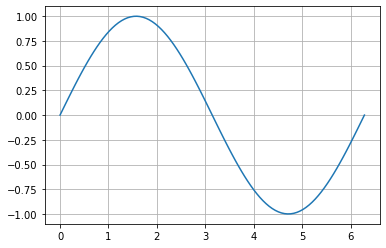

In [9]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.grid()

Now, what if we want to repeat that calculation for a sequence of $k$? Say, $k \in [1..3]$.  Naively, one can try to represent $k$ as an array and try to carry out the multiplication:

In [10]:
k = np.arange(1,4)
k*x

ValueError: operands could not be broadcast together with shapes (3,) (100,) 

Which attempts to align the vectors and multiply element-wise: ``x[0]*k[0], x[1]*k[1], ...``, which is neither possible nor desirable.

One can do in a for loop, but a more elegant and efficient solution would be to represent $x$ and $k$ as different dimensions (or axis), so that ``numpy`` understand that the values from each of the vectors represent different parameters. See the shapes in the error message above? How about turning them into ``(1, 3)`` and ``(100, 1)``?

In [11]:
print(f"New shape for x: {x[:, None].shape}")
print(f"New shape for k: {k[None, :].shape}")

New shape for x: (100, 1)
New shape for k: (1, 3)


When [indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) an array ``:`` represents all values along the axis, while ``None`` stands for a new [singleton axis](https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.newaxis). Thus:

Now y is a 2D array with the shape of (100, 3) and can be conveniently plotted


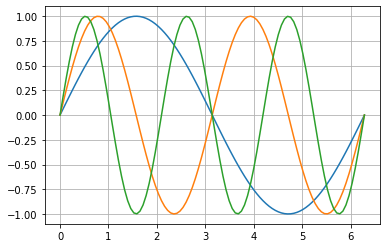

In [12]:
y = np.sin(k[None, :] * x[:, None])
print(f"Now y is a 2D array with the shape of {y.shape} and can be conveniently plotted")
plt.plot(x, y)
plt.grid()

Furthermore, besides applying predefined ``numpy`` functions to arrays, sometimes it might me reasonable to combine some operations into custom functions. Consider, for example a point moving in 2D on a unit circle with frequency $f$. Its Cartesian coordinates can be expressed as
$$\begin{aligned}
    x&=\cos 2\pi f t\\
    y&=\sin 2\pi f t
\end{aligned}$$
which can be represented as a single function:

In [13]:
def trajectory(t, f):
    """ Compute Cartesian coordinates from eqs. above 
    Parameters:
    -----------
    t : ndarray,
        1D array of time points in seconds
    f : float
        Frequency in Hz. 
    Returns:
    --------
    xy : ndarray, shape: (len(t), 2)
        Array of Cartesian coordinates for each time point.
        Axis 0 represents the time, axis 1 -- Cartesian coordinates
    """
    x = np.cos(2*np.pi * t * f)
    y = np.sin(2*np.pi * t * f)
    return np.stack([x, y], axis=-1)

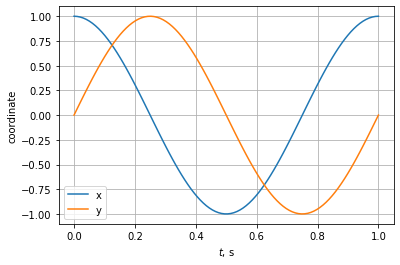

In [14]:
t = np.linspace(0, 1, 100) # 0:1s with the step of 10 ms
f = 1 # Hz
xy = trajectory(t, f)
plt.plot(t, xy)
plt.legend(["x", "y"])
plt.xlabel("$t$, s")
plt.ylabel("coordinate")
plt.grid()

**A word of caution:** when working with multidimensional arrays keeping track of the axes and what they represent is crucial and failing to do so can lead to all sorts of cryptic errors. 

The next cell illustrates the power of broadcasting and dimension manipulation. Even though the function above claims to expect ``f`` being a scalar, careful understanding of the order of axis allows to hijack it to work with a vector of frequencies. We will leave this example as an exercise for a motivated the reader to understand, break, and fix.

Now the result is a 3D array of shape (3, 100, 2) where the axes represent the frequency, time, and components correspondingly


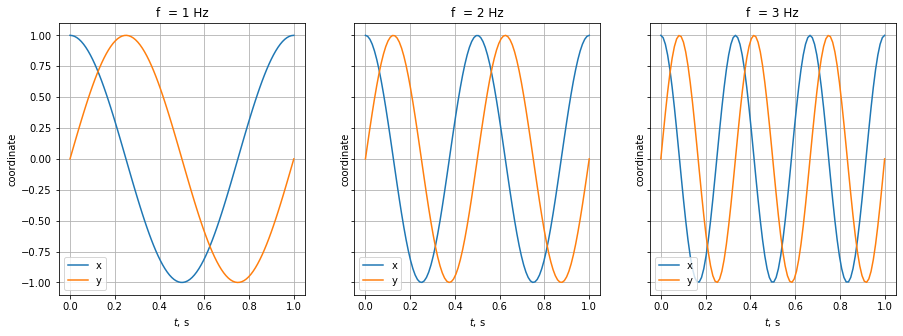

In [15]:
fs = np.arange(1, 4)
xys = trajectory(t[None,:], fs[:, None])
print(f"Now the result is a 3D array of shape {xys.shape} where the axes represent the frequency, time, and components correspondingly")

fig, axes = plt.subplots(ncols=3, figsize=(15,5), sharex=True, sharey=True)
for ax, traj, f in zip(axes, xys, fs.flat):
    ax.plot(t, traj)
    ax.legend(["x", "y"])
    ax.set_xlabel("$t$, s")
    ax.set_ylabel("coordinate")
    ax.set_title(f"f  = {f} Hz")
    ax.grid()

We do appreciate that for someone who has not used python or has not had experience with computations, this very brief introduction can still feel daunting. We nonetheless encourage everyone to try and play around with the code in the notebook, exercise their internet search skills, and of course reach out to us *in the following manner [explanation of our "office hours"]*. For some further introduction in python for computational purposes, one can see, for example, [this resource](https://nbviewer.jupyter.org/gist/anonymous/5924718).